<a href="https://colab.research.google.com/github/Tamima-Azad/Digital-Image-Processing/blob/main/lab8(0812220105101060).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Using Numpy array, create an image with two circle and a structuring element. Perform morphological Erosion and Dilation using built-in function. Show the original image, SE, eroded image and dilated image side by side in a subplot with a title.

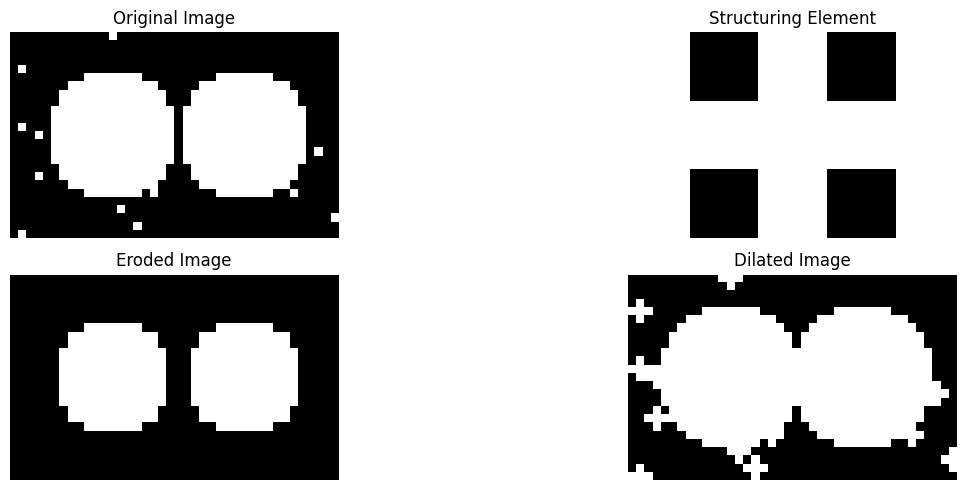

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import (erosion, dilation, closing,opening, area_closing, area_opening)
from skimage.color import rgb2gray
element = np.array([[0,1,0], [1,1,1], [0,1,0]])
circle_image = np.zeros((25, 40))
circle_image[disk((12, 12), 8)] = 1
circle_image[disk((12, 28), 8)] = 1
for x in range (20):
  circle_image[np.random.randint (25), np.random.randint(40)] = 1
#imshow(circle_image);
erosion=erosion(circle_image, element);
dilation=dilation(circle_image, element);
#Plot the images
plt.figure(figsize=(15,5))
#Plot the original image
plt.subplot (2, 2, 1)
plt.imshow(circle_image,cmap='gray')
plt.title('Original Image')
plt.axis('off')
# Plot the Structuring Element
plt.subplot(2, 2, 2)
plt.imshow(element, cmap='gray')
plt.title('Structuring Element')
plt.axis('off')
# Plot the Eroded image
plt.subplot(2, 2, 3)
plt.imshow(erosion,cmap='gray')
plt.title('Eroded Image')
plt.axis('off')
#Plot the dilated image
plt.subplot(2, 2, 4)
plt.imshow(dilation,cmap='gray')
plt.title('Dilated Image')
plt.axis('off')
plt.tight_layout()
plt.show()



2. Using Numpy array, create an image with two circle and a structuring element. Perform morphological Erosion and Dilation without using built-in function. Show the original image, SE, eroded image and dilated image side by side in a subplot with a title.

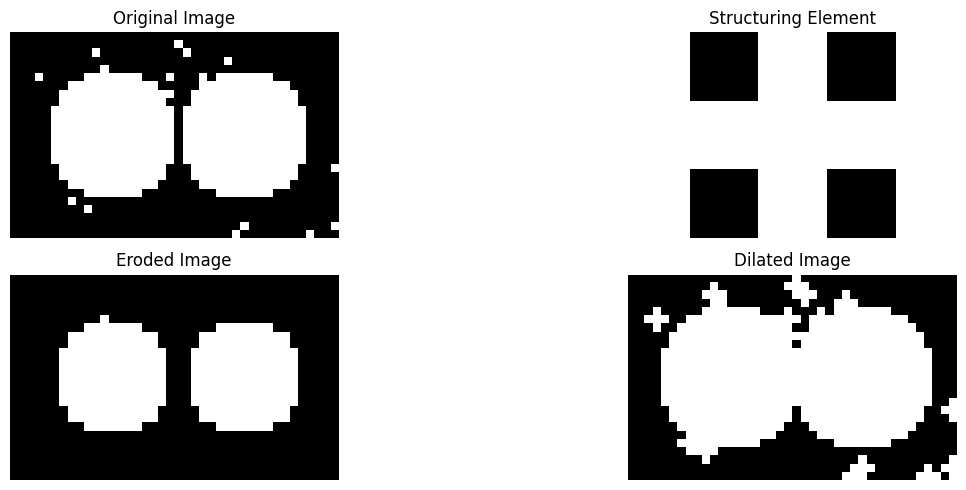

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#define a structuring element. These can be an array of any size as long as it has a smaller shape than the input image.
SE = np.array([[0,1,0], [1,1,1], [0,1,0]])
circle_image = np.zeros((25, 40))
circle_image[disk((12, 12), 8)] = 1
circle_image[disk((12, 28), 8)] = 1
for x in range (20):
    circle_image[np.random.randint(25), np.random.randint(40)] = 1
image = circle_image
# Define morphological erosion and dilation functions
def custom_erosion (image, SE):
    eroded_image = np.zeros_like (image)
    padded_image = np.pad (image, 1, mode='constant', constant_values=0)
    se_rows, se_cols = SE.shape
    for i in range (1, padded_image.shape[0] - 1):
        for j in range (1, padded_image.shape[1] - 1):
            #Extract the region of interest
            region = padded_image [i-1:i+2, j-1:j+2]
            if np.all(region[SE==1] == 1): #Check if all SE elements match the region
                eroded_image [i-1,j-1] = 1
    return eroded_image
def custom_dilation (image, SE):
    dilated_image = np.zeros_like (image)
    padded_image = np.pad (image, 1, mode='constant', constant_values=0)
    se_rows, se_cols = SE.shape
    for i in range (1, padded_image.shape[0] - 1):
        for j in range (1, padded_image.shape[1] - 1):
            # Extract the region of interest
            region = padded_image [i-1:i+2, j-1:j+2]
            if np.any (region[SE==1] == 1): #Check if any SE elements match the region
                dilated_image [i-1, j-1] = 1
    return dilated_image
    # Perform erosion and dilation
eroded_image = custom_erosion(image, SE)
dilated_image = custom_dilation(image, SE)

# Plot the images
plt.figure(figsize=(15,5))

# Plot the original image
plt.subplot(2, 2, 1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the Structuring Element
plt.subplot(2, 2, 2)
plt.imshow(SE,cmap='gray')
plt.title('Structuring Element')
plt.axis('off')

# Plot the Eroded image
plt.subplot(2, 2, 3)
plt.imshow(eroded_image,cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

# Plot the dilated image
plt.subplot(2, 2, 4)
plt.imshow(dilated_image,cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

plt.tight_layout()
plt.show()


3. Using Numpy array, create an image with two circle and a structuring element. Perform successive (two times) morphological Erosion and Dilation using built-in function. Show the original image, SE, eroded image and dilated image side by side in a subplot with a title.

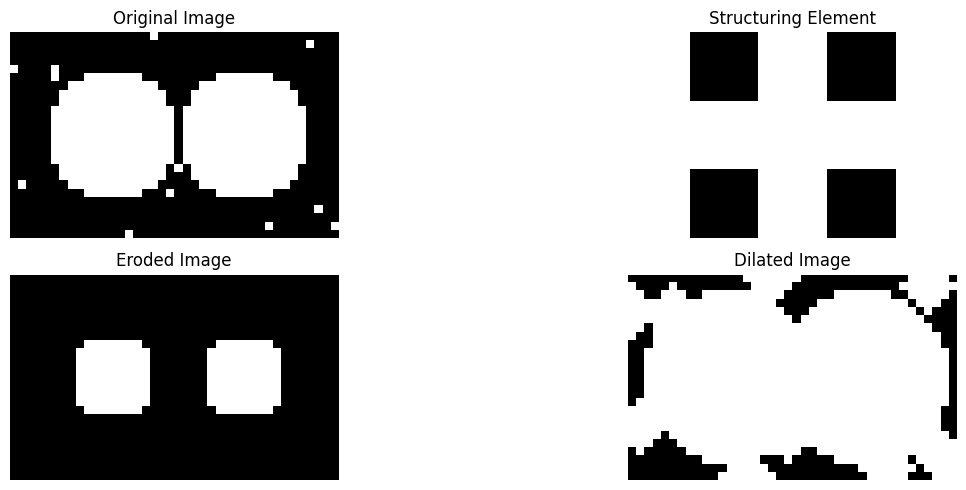

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import (erosion, dilation, closing,
opening, area_closing, area_opening)
from skimage.color import rgb2gray
#define a structuring element. These can be an array of any size as long as it has a smaller shape than the input image.
element = np.array([[0,1,0], [1,1,1], [0,1,0]])
#plt.imshow(element, cmap='gray');
#To demonstrate how morphological operations work, let us create two adjacent circles with random noise on its background.
circle_image = np.zeros((25, 40))
circle_image[disk((12, 12), 8)] = 1
circle_image[disk((12, 28), 8)] = 1
for x in range (20):
    circle_image[np.random.randint(25), np.random.randint(40)] = 1
#imshow(circle_image);
def multi_dil(im, num, element=element):
    for i in range(num):
        im = dilation(im, element)
    return im

def multi_ero(im, num, element=element):
    for i in range(num):
        im = erosion(im, element)
    return im
erosion=multi_ero(circle_image,3);
dilation=multi_dil(circle_image,3);
#Plot the images
plt.figure(figsize=(15,5))
# plot the original image
plt.subplot(2, 2, 1)
plt.imshow(circle_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
#Plot the Structuring Element
plt.subplot(2, 2, 2)
plt.imshow(element, cmap='gray')
plt.title('Structuring Element')
plt.axis('off')

#Plot the Eroded image
plt.subplot(2, 2, 3)
plt.imshow(erosion, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

#Plot the dilated image
plt.subplot(2, 2, 4)
plt.imshow(dilation, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

plt.tight_layout()
plt.show()



4. Using Numpy array, create an image with two circle and a structuring element. Perform successive (two times) morphological Erosion and Dilation without using built-in function. Show the original image, SE, eroded image and dilated image side by side in a subplot with a title.

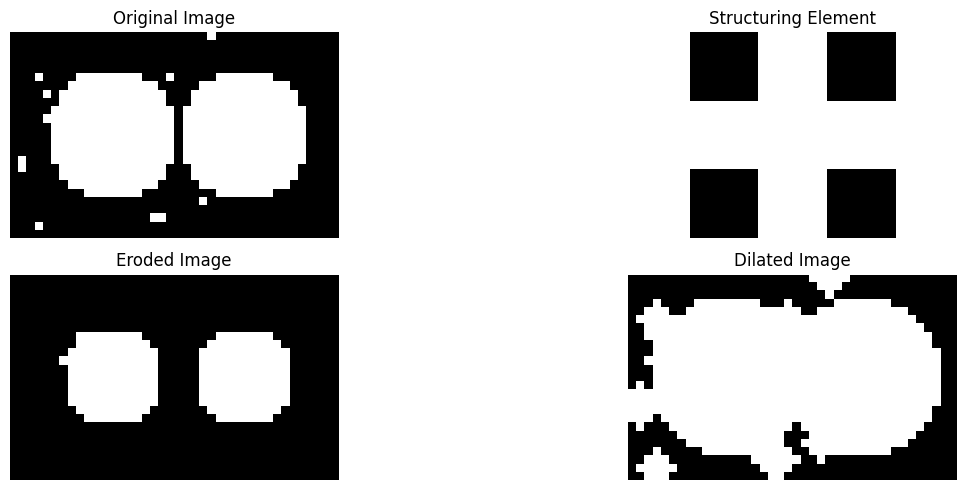

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#define a structuring element. These can be an array of any size as long as it has a smaller shape than the input image.
SE = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])

#plt.imshow(element, cmap='gray');

#To demonstrate how morphological operations work, let us create two adjacent circles with random noise on its background.
circle_image = np.zeros((25, 40))
circle_image[disk((12, 12), 8)] = 1
circle_image[disk((12, 28), 8)] = 1
for x in range(20):
    circle_image[np.random.randint(25), np.random.randint(40)] = 1
image = circle_image

# Define morphological erosion and dilation functions
def custom_erosion (image, SE):
    eroded_image = np.zeros_like(image)
    padded_image = np.pad(image, 1, mode='constant', constant_values=0)
    for i in range(1, padded_image.shape[0] - 1):
        for j in range(1, padded_image.shape[1] - 1):
            region = padded_image[i-1:i+2, j-1:j+2]
            if np.all(region[SE == 1] == 1):
                eroded_image[i-1, j-1] = 1
    return eroded_image

def custom_dilation(image, SE):
    dilated_image = np.zeros_like(image)
    padded_image = np.pad(image, 1, mode='constant', constant_values=0)
    for i in range(1, padded_image.shape[0] - 1):
        for j in range(1, padded_image.shape[1] - 1):
            region = padded_image[i-1:i+2, j-1:j+2]
            if np.any(region[SE == 1] == 1):
                dilated_image[i-1, j-1] = 1
    return dilated_image

# Define functions for successive erosion and dilation
def successive_erosion(image, SE, iterations):
    eroded_image = image.copy()
    for _ in range(iterations):
        eroded_image = custom_erosion(eroded_image, SE)
    return eroded_image

def successive_dilation(image, SE, iterations):
    dilated_image = image.copy()
    for _ in range(iterations):
        dilated_image = custom_dilation(dilated_image, SE)
    return dilated_image

# Perform successive erosion and dilation
iterations = 2
eroded_image_successive = successive_erosion(image, SE, iterations)
dilated_image_successive = successive_dilation(image, SE, iterations)

# Plot the images
plt.figure(figsize=(15, 5))

# Plot the original image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the Structuring Element
plt.subplot(2, 2, 2)
plt.imshow(SE, cmap='gray')
plt.title('Structuring Element')
plt.axis('off')

#plot the Eroded image
plt.subplot(2,2,3)
plt.imshow(eroded_image_successive, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

# plot the dilated image
plt.subplot(2, 2, 4)
plt.imshow(dilated_image_successive, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

plt.tight_layout()
plt.show()



5. Using Numpy array, create an image with two circle and a structuring element. Perform morphological opening and closing using built-in function. Show the original image, SE, opened image and closed image side by side in a subplot with a title.

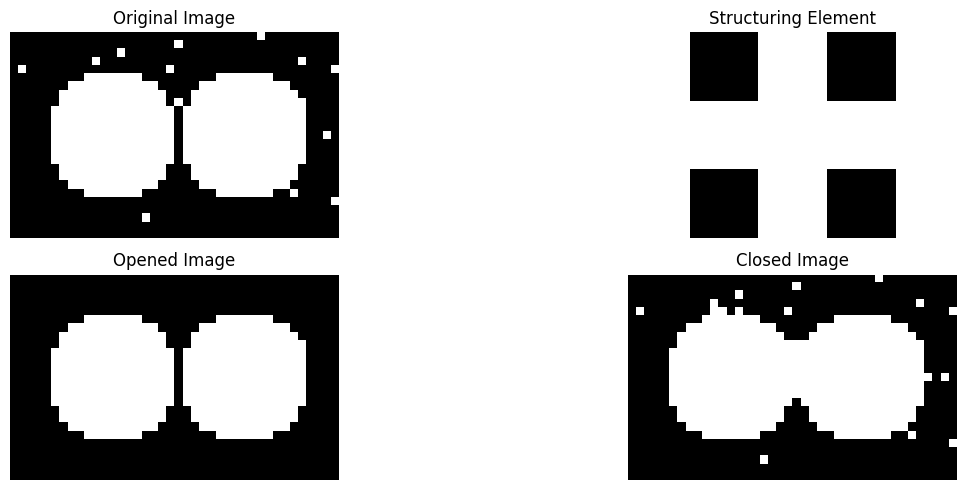

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import (erosion, dilation, closing,
opening, area_closing, area_opening)
from skimage.color import rgb2gray

element = np.array([[0,1,0], [1,1,1], [0,1,0]])
#plt.imshow(element, cmap='gray');
#To demonstrate how morphological operations work, let us create two adjacent circles with random noise on its background.
circle_image = np.zeros((25, 40))
circle_image[disk((12, 12), 8)] = 1
circle_image[disk((12, 28), 8)] = 1
for x in range (20):
    circle_image[np.random.randint(25), np.random.randint(40)] = 1
#imshow(circle_image);
#Erosion removes islands and small objects so that only the key features will remain. Meanwhile, dilation makes objects more visible and fills in small holes in objects.
opening=opening(circle_image, element);
closing=closing(circle_image, element);
# Plot the images.
plt.figure(figsize=(15,5))
#Plot the original image
plt.subplot (2, 2, 1)
plt.imshow(circle_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
# Plot the Structuring Element
plt.subplot (2, 2, 2)
plt.imshow(element,cmap='gray')
plt.title('Structuring Element')
plt.axis('off')
# Plot the opened image
plt.subplot(2, 2, 3)
plt.imshow(opening,cmap='gray')
plt.title('Opened Image')
plt.axis('off')
# Plot the closed image
plt.subplot (2, 2, 4)
plt.imshow(closing,cmap='gray')
plt.title('Closed Image')
plt.axis('off')
plt.tight_layout()
plt.show()


6. Using Numpy array, create an image with two circle and a structuring element. Perform morphological opening and closing without using built-in function. Show the original image, SE, opened image and closed image side by side in a subplot with a title.

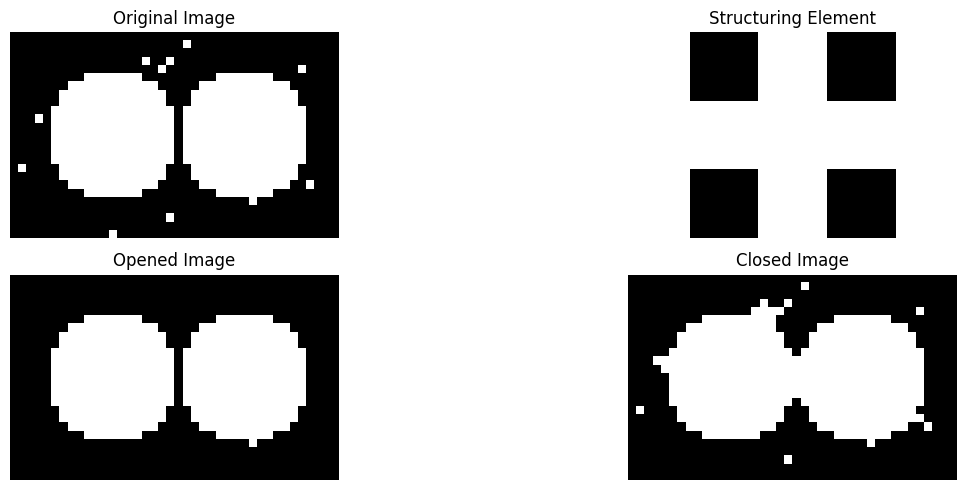

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#define a structuring element. These can be an array of any size as long as it has a smaller shape than the input image.
SE = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
# To demonstrate how morphological operations work, let us create two adjacent circles with random noise on its background.
circle_image = np.zeros((25, 40))
circle_image[disk((12, 12), 8)] = 1
circle_image[disk((12, 28), 8)] = 1
for x in range (20):
    circle_image[np.random.randint (25), np.random.randint(40)] = 1
image = circle_image

# Define morphological erosion and dilation functions
def custom_erosion (image, SE):
    eroded_image = np.zeros_like (image)
    padded_image = np.pad (image, 1, mode='constant', constant_values=0)
    for i in range (1, padded_image.shape[0] - 1):
        for j in range (1, padded_image.shape[1] - 1):
            region = padded_image [i - 1:i + 2, j - 1:j + 2]
            if np.all (region [SE == 1] == 1):
                eroded_image [i - 1, j - 1] = 1
    return eroded_image

def custom_dilation(image, SE):
    dilated_image = np.zeros_like (image)
    padded_image = np.pad (image, 1, mode='constant', constant_values=0)
    for i in range (1, padded_image.shape[0] - 1):
        for j in range (1, padded_image.shape[1] - 1):
            region = padded_image[i - 1:i + 2, j - 1:j + 2]
            if np.any(region[SE == 1] == 1):
                dilated_image[i - 1, j - 1] = 1
    return dilated_image

# Define opening operation (erosion followed by dilation)
def opening (image, SE):
    eroded_image = custom_erosion (image, SE)
    opened_image = custom_dilation (eroded_image, SE)
    return opened_image

# Define closing operation (dilation followed by erosion)
def closing (image, SE):
    dilated_image = custom_dilation (image, SE)
    closed_image = custom_erosion (dilated_image, SE)
    return closed_image

# Perform opening and closing
opened_image = opening (image, SE)
closed_image = closing(image, SE)

#Plot the images
plt.figure(figsize=(15,5))
#Plot the original image
plt.subplot(2, 2, 1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')
# Plot the Structuring Element
plt.subplot(2, 2, 2)
plt.imshow(SE,cmap='gray')
plt.title('Structuring Element')
plt.axis('off')
# Plot the Eroded image
plt.subplot(2, 2, 3)
plt.imshow(opened_image,cmap='gray')
plt.title('Opened Image')
plt.axis('off')
#Plot the dilated image
plt.subplot(2, 2, 4)
plt.imshow(closed_image,cmap='gray')
plt.title('Closed Image')
plt.axis('off')
plt.tight_layout()
plt.show()


7. Using Numpy array, create an image with two circle and a structuring element. Perform successive (three times) morphological opening and closing without using built-in function. Show the original image, SE, opened image and closed image side by side in a subplot with a title.

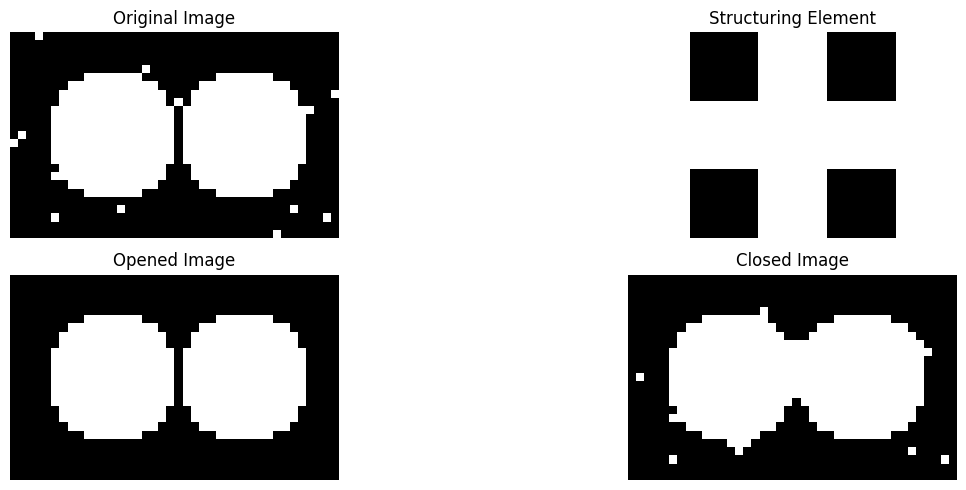

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#define a structuring element.
SE= np.array([[0,1,0], [1,1,1], [0,1,0]])
circle_image = np.zeros((25, 40))
circle_image[disk((12, 12), 8)] = 1
circle_image[disk((12, 28), 8)] = 1
for x in range (20):
    circle_image[np.random.randint(25), np.random.randint(40)] = 1
image = circle_image
# Custom erosion function
def custom_erosion (image, SE):
    eroded_image = np.zeros_like(image)
    padded_image = np.pad(image, 1, mode='constant', constant_values=0)
    for i in range (1, padded_image.shape[0] - 1):
        for j in range (1, padded_image.shape[1] - 1):
            region = padded_image[i-1:i+2, j-1:j+2]
            if np.all(region[SE == 1] == 1):
                eroded_image[i-1,j-1] = 1
    return eroded_image
#Custom dilation function
def custom_dilation(image, SE):
    dilated_image = np.zeros_like(image)
    padded_image = np.pad(image, 1, mode='constant', constant_values=0)
    for i in range(1, padded_image.shape[0] - 1):
        for j in range(1, padded_image.shape[1] - 1):
            region = padded_image[i-1:i+2, j-1:j+2]
            if np.any(region[SE == 1] == 1):
                dilated_image[i-1, j-1] = 1
    return dilated_image
# Define opening operations
def opening(image, SE, iterations=1):
    opened_image = image.copy()
    for _ in range(iterations):
        eroded_image = custom_erosion(opened_image, SE)
        opened_image = custom_dilation(eroded_image, SE)
    return opened_image
# Define closing operations
def closing(image, SE, iterations=1):
    closed_image = image.copy()
    for _ in range(iterations):
        dilated_image = custom_dilation(closed_image, SE)
        closed_image = custom_erosion(dilated_image, SE)
    return closed_image
# Number of successive iterations
iterations = 3
# Perform successive opening and closing
opened_image_successive = opening(image, SE, iterations)
closed_image_successive = closing(image, SE, iterations)
#Plot the images
plt.figure(figsize=(15, 5))
#Plot the original image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
#Plot the Structuring Element
plt.subplot(2, 2, 2)
plt.imshow(SE, cmap='gray')
plt.title('Structuring Element')
plt.axis('off')
#Plot the opened image
plt.subplot(2, 2, 3)
plt.imshow(opened_image_successive, cmap='gray')
plt.title('Opened Image')
plt.axis('off')
#Plot the closed image
plt.subplot(2, 2, 4)
plt.imshow(closed_image_successive, cmap='gray')
plt.title('Closed Image')
plt.axis('off')

plt.tight_layout()
plt.show()



8. Take a color image. Create an appropriate structuring element. Perform morphological operations to enhance the image using build-in function. Show the original image, SE, and every morphological steps side by side in a subplot with a title

Mounted at /content/drive


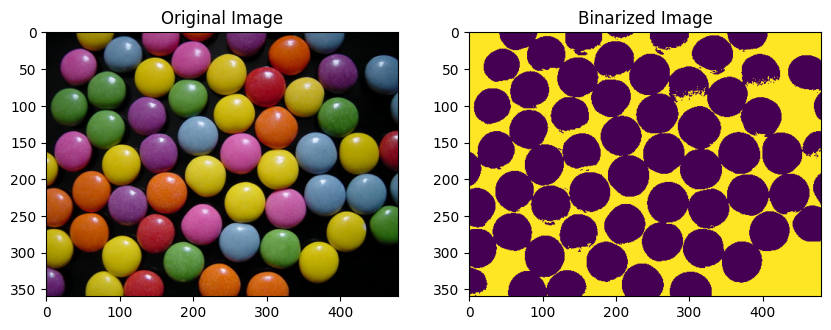

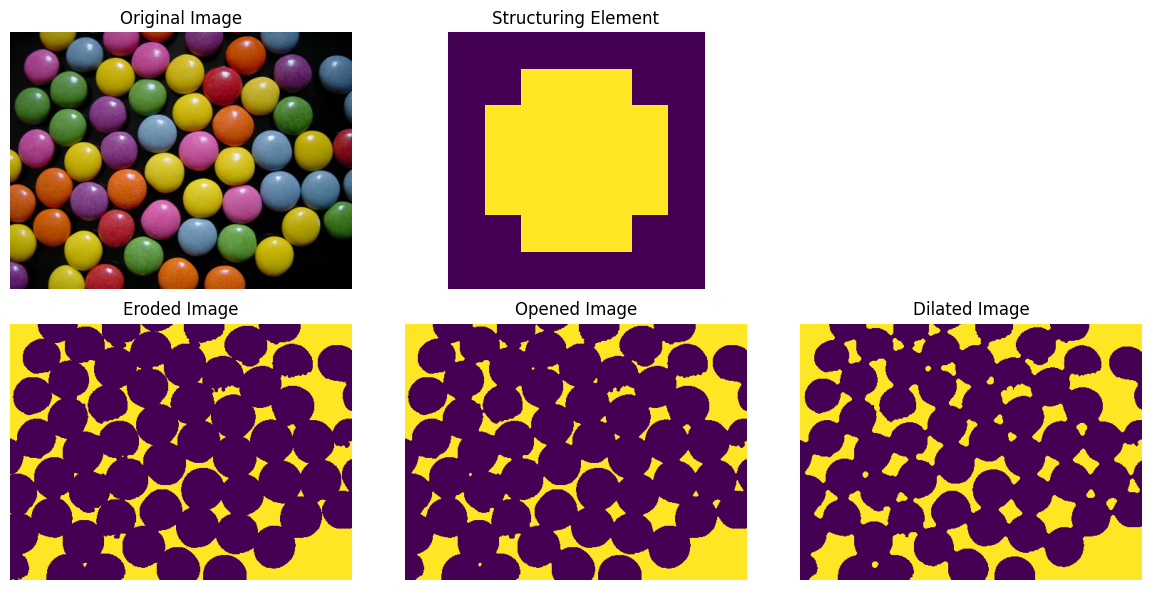

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import (erosion, dilation, closing, opening, area_closing, area_opening)
from skimage.color import rgb2gray
from PIL import Image
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
#Load the color image
input_image_path = "/content/drive/MyDrive/storage_2/CSE-3216/images/2Dpg6.jpg" # Replace with your image path
original_image = Image.open(input_image_path)
image_np = np.array(original_image) # Use original_image instead of image
#Original Image
leaves = original_image
#Binarized Image
binary = rgb2gray(leaves) < 0.15
# Plot the images
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(leaves);
ax[0].set_title('Original Image')
ax[1].imshow(binary)
ax[1].set_title('Binarized Image')
#Even though we applied a low value to threshold the binary image, the binary image is still dirty. This is because of the vines and the lattice frame that is also of the same shade. Luckily, the vines and lattice frame is much thinner than the leaves thus, we can apply morphological operations.
#we will use a 7x7 structuring element because of the larger shape of the actual image
element = np.array([[0,0,0,0,0,0,0],
[0,0,1,1,1,0,0],
[0,1,1,1,1,1,0],
[0,1,1,1,1,1,0],
[0,1,1,1,1,1,0],
[0,0,1,1,1,0,0],
[0,0,0,0,0,0,0]])
#Using this structuring element, we can apply erosion operations to remove the vines and the lattice frame.
def multi_ero(im, num, element=element):
    for i in range(num):
        im = erosion(im, element)
    return im
multi_eroded = multi_ero(binary, 1, element) # Apply erosion to the binary image
opened = opening(multi_eroded)
#See the changes in the image? It is very minute, but the remaining noise was removed by applying the opening operation while still maintaining the key feature of the image. This is vital because our next step is dilation which can easily magnify the remaining noise.
def multi_dil(im, num, element=element):
    for i in range(num):
        im = dilation(im, element)
    return im
multi_diluted = multi_dil(opened, 1, element)
#Plot the images
plt.figure(figsize=(12, 6))
#Plot the original image
plt.subplot(2, 3, 1)
plt.imshow(leaves)
plt.title('Original Image')
plt.axis('off')
#Plot the Structuring Element
plt.subplot(2, 3, 2)
plt.imshow(element)
plt.title('Structuring Element')
plt.axis('off')
#Plot the Eroded image
plt.subplot(2, 3, 4)
plt.imshow(multi_eroded) # Display the eroded image
plt.title('Eroded Image')
plt.axis('off')
# plot the opened image
plt.subplot(2, 3, 5)
plt.imshow(opened)
plt.title('Opened Image')
plt.axis('off')
# plot the dialated image
plt.subplot(2, 3, 6)
plt.imshow(multi_diluted)
plt.title('Dilated Image')
plt.axis('off')
plt.tight_layout()
plt.show()


9. Take a color image. Create an appropriate structuring element. Perform morphological operations to enhance the image without using build-in function. Show the original image, SE, and every morphological steps side by side in a subplot with a title.

Mounted at /content/drive


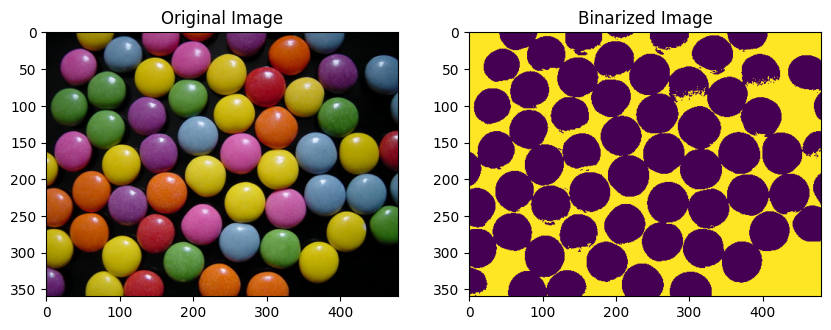

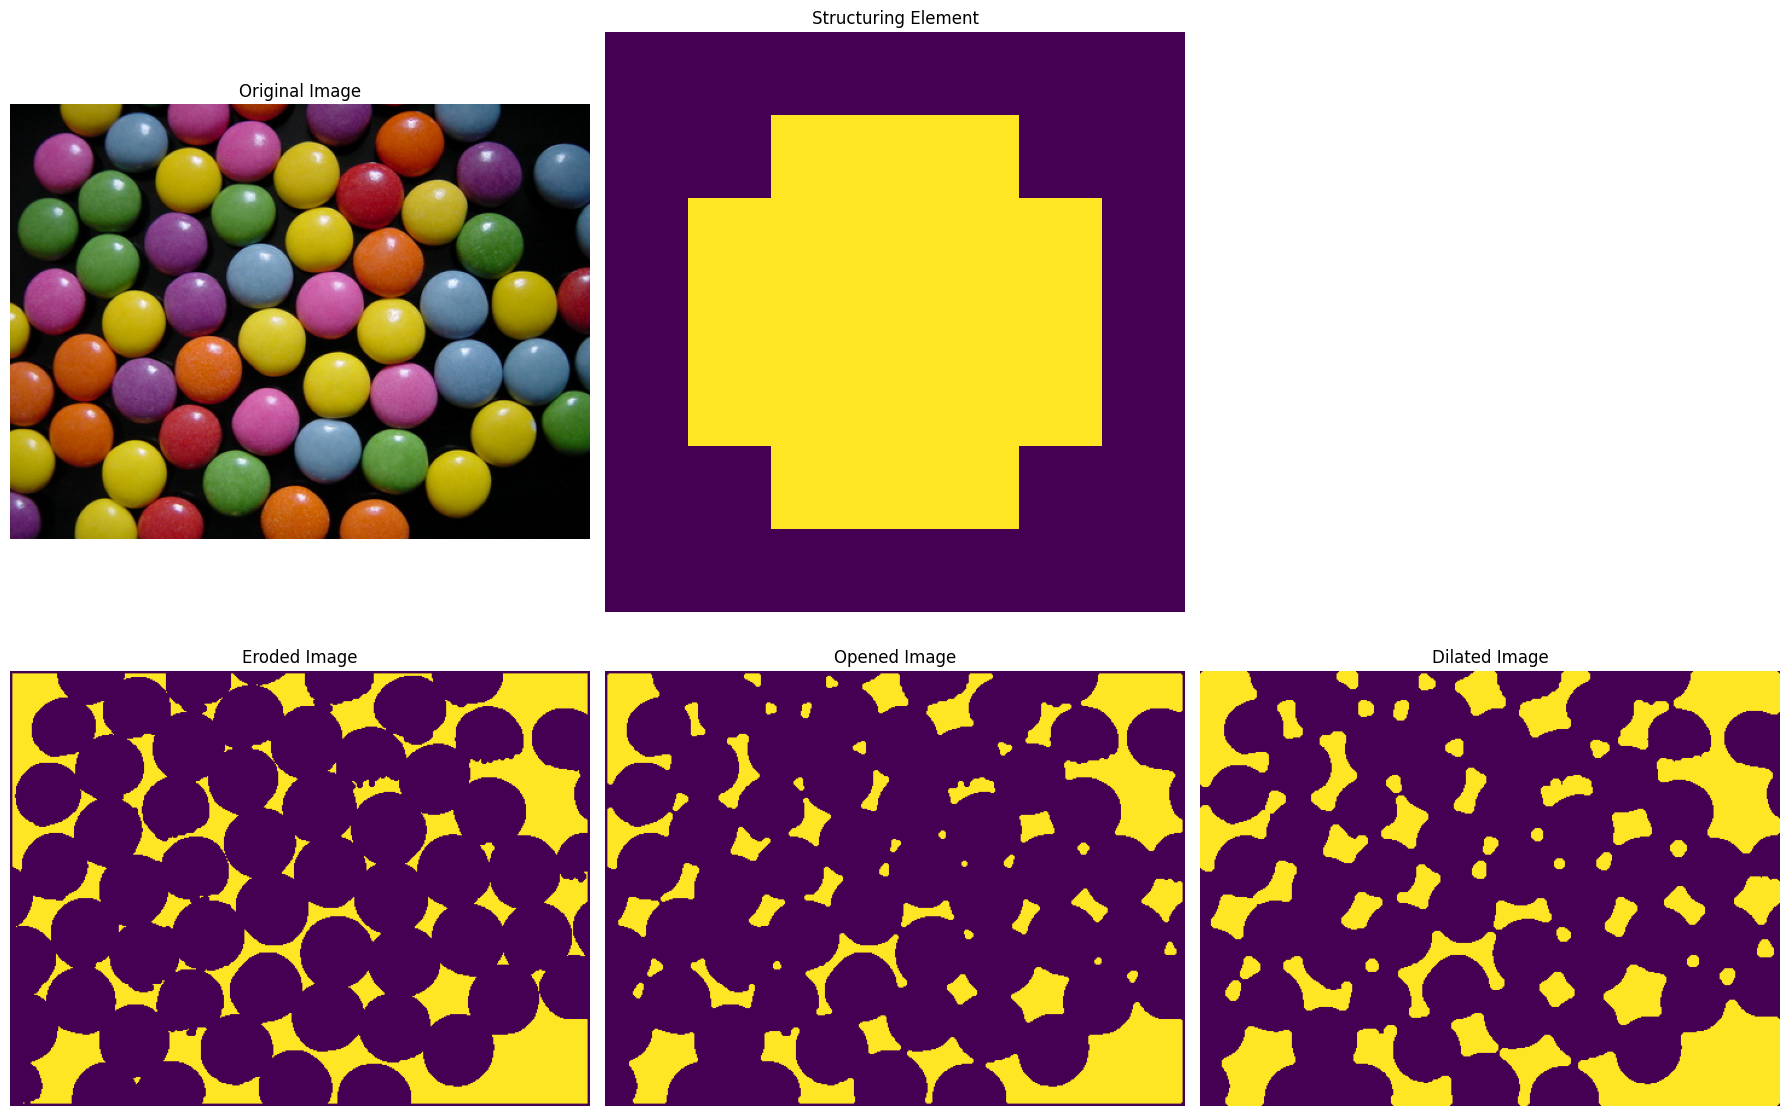

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import (erosion, dilation, closing, opening, area_closing, area_opening)
from skimage.color import rgb2gray
from PIL import Image
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
input_image_path="/content/drive/MyDrive/storage_2/CSE-3216/images/2Dpg6.jpg" # Replace with your image path
original_image = Image.open(input_image_path)
image_np = np.array(original_image) # Use original_image instead of image

leaves = original_image
binary = rgb2gray(leaves) < 0.15
image = binary
fig, ax = plt.subplots (1,2, figsize=(10,5))
ax[0].imshow(leaves);
ax[0].set_title('Original Image')
ax[1].imshow(image)
ax[1].set_title('Binarized Image')

SE = np.array([[0,0,0,0,0,0,0],
[0,0,1,1,1,0,0],
[0,1,1,1,1,1,0],
[0,1,1,1,1,1,0],
[0,1,1,1,1,1,0],
[0,0,1,1,1,0,0],
[0,0,0,0,0,0,0]])
def custom_erosion (image, SE):
    eroded_image = np.zeros_like (image)
    pad_width = SE.shape[0] // 2 # Calculate padding width
    padded_image = np.pad(image, pad_width, mode='constant', constant_values=0)
    se_rows, se_cols = SE.shape
    for i in range (pad_width, padded_image.shape [0] -pad_width):
        for j in range (pad_width, padded_image.shape[1] -pad_width):
            region = padded_image [i - pad_width:i + pad_width + 1,
                                   j - pad_width:j + pad_width + 1]
            if np.all (region[SE == 1] == 1):
                eroded_image [i - pad_width, j - pad_width] = 1 # Set pixel in eroded image
    return eroded_image
def custom_dilation (image, SE):
  dilated_image = np.zeros_like(image)

  pad_width = SE.shape[0] // 2 # Calculate padding width
  padded_image = np.pad(image, pad_width, mode='constant',
                      constant_values=0)
  se_rows, se_cols = SE.shape
  for i in range(pad_width, padded_image.shape[0] -
                pad_width):
      for j in range(pad_width, padded_image.shape[1] -
                    pad_width):
        region = padded_image[i - pad_width:i + pad_width + 1, j - pad_width:j + pad_width + 1]
        if np.any(region[SE == 1] == 1):
          dilated_image[i - pad_width, j - pad_width] = 1
  return dilated_image

def successive_erosion(image, SE, iterations):
    eroded_image = image.copy()
    for _ in range(iterations):
        eroded_image = custom_erosion(eroded_image, SE)
    return eroded_image

def successive_dilation(image, SE, iterations):
    dilated_image = image.copy()
    for _ in range(iterations):
        dilated_image = custom_dilation(dilated_image, SE)
    return dilated_image

def opening(image, SE):
    eroded_image = custom_erosion(image, SE)
    opened_image = custom_dilation(eroded_image, SE)
    return opened_image

def closing(image, SE):
    dilated_image = custom_dilation(image, SE)
    closed_image = custom_erosion(dilated_image, SE)
    return closed_image

iterations = 1
eroded_image_successive = successive_erosion(image, SE, iterations)
opened_image = opening(eroded_image_successive, SE)
dilated_image_successive = successive_dilation(opened_image, SE, iterations)
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 1)
plt.imshow(leaves)
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(SE)
plt.title('Structuring Element')
plt.axis('off')
plt.subplot(2, 3, 4)
plt.imshow(eroded_image_successive) # Display the eroded image
plt.title('Eroded Image')
plt.axis('off')
plt.subplot(2, 3, 5)
plt.imshow(opened_image) # Display the opened image
plt.title('Opened Image')
plt.axis('off')
plt.subplot(2, 3, 6)
plt.imshow(dilated_image_successive) # Display the dilated image
plt.title('Dilated Image')
plt.axis('off')
plt.tight_layout()
plt.show()